In [2]:
import Useful_functions as uf
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import f_oneway
import statsmodels.stats.power as stats_power
import pingouin as pg
import scipy.stats as stats
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
all_responses_filtered = pd.read_csv("all_responses_filtered.csv")

all_responses_filtered.head()

,Unnamed: 0,Decoy,Item,Option_1,Option_2,Option_3,Choice,CatchTrials,Deliberation_RT,Choice_RT,Too_Slow,Survey_ID,CouplingCondition,PhantomCondition
0,0,F,Kitchen Scale,A,C,B,C,NaN,10000,620.0,0,40781,High coupling,Highly_desirable
1,1,C,Baby crib,C_A,B,A,A,NaN,10000,389.0,0,40781,High coupling,Highly_desirable
2,2,S,Baby high chair,A,B,S_B,B,NaN,10000,761.0,0,40781,High coupling,Highly_desirable
3,3,A,Leaf Blower,A,B,A_B,A,NaN,10000,308.0,0,40781,High coupling,Highly_desirable
4,4,P,Wifi extender,A,B,P_B,A,NaN,10000,586.0,0,40781,High coupling,Highly_desirable


In [4]:
# Define important variables (based on A_Preprocessing.ipynb)
total_n = 125

number_of_low_coupling = 61
number_of_high_coupling = 64

number_of_HD = 40
number_of_WD = 46
number_of_U = 39

Participants_PIDs = all_responses_filtered["Survey_ID"].unique()

## Phantom Decoys

### Highly Desirable Group

In [5]:
decoy_P_df = all_responses_filtered[all_responses_filtered["Decoy"] == "P"]

decoy_P_HD_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Highly_desirable"]
decoy_P_HD_df_LowC = decoy_P_HD_df[decoy_P_HD_df["CouplingCondition"] == "Low coupling"]
decoy_P_HD_df_HighC = decoy_P_HD_df[decoy_P_HD_df["CouplingCondition"] == "High coupling"]

decoy_P_HD_df = decoy_P_HD_df.reset_index()
decoy_P_HD_df_LowC = decoy_P_HD_df_LowC.reset_index()
decoy_P_HD_df_HighC = decoy_P_HD_df_HighC.reset_index()

total_n = decoy_P_HD_df["Survey_ID"].unique()
number_of_low_coupling = decoy_P_HD_df_LowC["Survey_ID"].unique()
number_of_high_coupling = decoy_P_HD_df_HighC["Survey_ID"].unique()

total_n = int(len(total_n))
number_of_low_coupling = int(len(number_of_low_coupling))
number_of_high_coupling = int(len(number_of_high_coupling))

decoy_P_HD_freq_df = uf.partFreq_PhantomDecoy(decoy_P_HD_df)
decoy_P_HD_LowC_freq_df = uf.partFreq_PhantomDecoy(decoy_P_HD_df_LowC)
decoy_P_HD_HighC_freq_df = uf.partFreq_PhantomDecoy(decoy_P_HD_df_HighC)

# Get mean, std, and sem for all participatns.
target_P_HD_mean, target_P_HD_std, target_P_HD_sem = uf.get_decoy_stats(decoy_P_HD_freq_df, "Target(%)", total_n)
competitor_P_HD_mean, competitor_P_HD_std, competitor_P_HD_sem = uf.get_decoy_stats(decoy_P_HD_freq_df, "Competitor(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_P_HD_LowC_mean, target_P_HD_LowC_std, target_P_HD_LowC_sem = uf.get_decoy_stats(decoy_P_HD_LowC_freq_df, "Target(%)", number_of_low_coupling)
competitor_P_HD_LowC_mean, competitor_P_HD_LowC_std, competitor_P_HD_LowC_sem = uf.get_decoy_stats(decoy_P_HD_LowC_freq_df, "Competitor(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_P_HD_HighC_mean, target_P_HD_HighC_std, target_P_HD_HighC_sem = uf.get_decoy_stats(decoy_P_HD_HighC_freq_df, "Target(%)", number_of_high_coupling)
competitor_P_HD_HighC_mean, competitor_P_HD_HighC_std, competitor_P_HD_HighC_sem = uf.get_decoy_stats(decoy_P_HD_HighC_freq_df, "Competitor(%)", number_of_high_coupling)

P_HD_summary_df = pd.DataFrame({'Target mean(%)': [target_P_HD_mean, target_P_HD_LowC_mean, target_P_HD_HighC_mean],
                  'Target sem(%)': [target_P_HD_sem, target_P_HD_LowC_sem, target_P_HD_HighC_sem],
                  'Comp mean(%)': [competitor_P_HD_mean, competitor_P_HD_LowC_mean, competitor_P_HD_HighC_mean],
                  'Comp sem(%)': [competitor_P_HD_sem, competitor_P_HD_LowC_sem, competitor_P_HD_HighC_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

P_HD_summary_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
All,58.12,1.64,41.88,1.64
LowCoupling,57.89,2.40,42.11,2.40
HighCoupling,58.33,2.30,41.67,2.30


### Weakly Desirable Group

In [6]:
decoy_P_WD_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Weakly_desirable"]
decoy_P_WD_df_LowC = decoy_P_WD_df[decoy_P_WD_df["CouplingCondition"] == "Low coupling"]
decoy_P_WD_df_HighC = decoy_P_WD_df[decoy_P_WD_df["CouplingCondition"] == "High coupling"]

decoy_P_WD_df = decoy_P_WD_df.reset_index()
decoy_P_WD_df_LowC = decoy_P_WD_df_LowC.reset_index()
decoy_P_WD_df_HighC = decoy_P_WD_df_HighC.reset_index()

total_n = decoy_P_WD_df["Survey_ID"].unique()
number_of_low_coupling = decoy_P_WD_df_LowC["Survey_ID"].unique()
number_of_high_coupling = decoy_P_WD_df_HighC["Survey_ID"].unique()

total_n = int(len(total_n))
number_of_low_coupling = int(len(number_of_low_coupling))
number_of_high_coupling = int(len(number_of_high_coupling))

decoy_P_WD_freq_df = uf.partFreq_PhantomDecoy(decoy_P_WD_df)
decoy_P_WD_LowC_freq_df = uf.partFreq_PhantomDecoy(decoy_P_WD_df_LowC)
decoy_P_WD_HighC_freq_df = uf.partFreq_PhantomDecoy(decoy_P_WD_df_HighC)

# Get mean, std, and sem for all participatns.
target_P_WD_mean, target_P_WD_std, target_P_WD_sem = uf.get_decoy_stats(decoy_P_WD_freq_df, "Target(%)", total_n)
competitor_P_WD_mean, competitor_P_WD_std, competitor_P_WD_sem = uf.get_decoy_stats(decoy_P_WD_freq_df, "Competitor(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_P_WD_LowC_mean, target_P_WD_LowC_std, target_P_WD_LowC_sem = uf.get_decoy_stats(decoy_P_WD_LowC_freq_df, "Target(%)", number_of_low_coupling)
competitor_P_WD_LowC_mean, competitor_P_WD_LowC_std, competitor_P_WD_LowC_sem = uf.get_decoy_stats(decoy_P_WD_LowC_freq_df, "Competitor(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_P_WD_HighC_mean, target_P_WD_HighC_std, target_P_WD_HighC_sem = uf.get_decoy_stats(decoy_P_WD_HighC_freq_df, "Target(%)", number_of_high_coupling)
competitor_P_WD_HighC_mean, competitor_P_WD_HighC_std, competitor_P_WD_HighC_sem = uf.get_decoy_stats(decoy_P_WD_HighC_freq_df, "Competitor(%)", number_of_high_coupling)

P_WD_summary_df = pd.DataFrame({'Target mean(%)': [target_P_WD_mean, target_P_WD_LowC_mean, target_P_WD_HighC_mean],
                  'Target sem(%)': [target_P_WD_sem, target_P_WD_LowC_sem, target_P_WD_HighC_sem],
                  'Comp mean(%)': [competitor_P_WD_mean, competitor_P_WD_LowC_mean, competitor_P_WD_HighC_mean],
                  'Comp sem(%)': [competitor_P_WD_sem, competitor_P_WD_LowC_sem, competitor_P_WD_HighC_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

P_WD_summary_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
All,54.13,1.64,45.87,1.64
LowCoupling,52.78,2.66,47.22,2.66
HighCoupling,55.00,2.11,45.00,2.11


### Undesirable Group

In [7]:
decoy_P_U_df = decoy_P_df[decoy_P_df["PhantomCondition"] == "Undesirable"]
decoy_P_U_df_LowC = decoy_P_U_df[decoy_P_U_df["CouplingCondition"] == "Low coupling"]
decoy_P_U_df_HighC = decoy_P_U_df[decoy_P_U_df["CouplingCondition"] == "High coupling"]

decoy_P_U_df = decoy_P_U_df.reset_index()
decoy_P_U_df_LowC = decoy_P_U_df_LowC.reset_index()
decoy_P_U_df_HighC = decoy_P_U_df_HighC.reset_index()

total_n = decoy_P_U_df["Survey_ID"].unique()
number_of_low_coupling = decoy_P_U_df_LowC["Survey_ID"].unique()
number_of_high_coupling = decoy_P_U_df_HighC["Survey_ID"].unique()

total_n = int(len(total_n))
number_of_low_coupling = int(len(number_of_low_coupling))
number_of_high_coupling = int(len(number_of_high_coupling))

decoy_P_U_freq_df = uf.partFreq_PhantomDecoy(decoy_P_U_df)
decoy_P_U_LowC_freq_df = uf.partFreq_PhantomDecoy(decoy_P_U_df_LowC)
decoy_P_U_HighC_freq_df = uf.partFreq_PhantomDecoy(decoy_P_U_df_HighC)

# Get mean, std, and sem for all participatns.
target_P_U_mean, target_P_U_std, target_P_U_sem = uf.get_decoy_stats(decoy_P_U_freq_df, "Target(%)", total_n)
competitor_P_U_mean, competitor_P_U_std, competitor_P_U_sem = uf.get_decoy_stats(decoy_P_U_freq_df, "Competitor(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_P_U_LowC_mean, target_P_U_LowC_std, target_P_U_LowC_sem = uf.get_decoy_stats(decoy_P_U_LowC_freq_df, "Target(%)", number_of_low_coupling)
competitor_P_U_LowC_mean, competitor_P_U_LowC_std, competitor_P_U_LowC_sem = uf.get_decoy_stats(decoy_P_U_LowC_freq_df, "Competitor(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_P_U_HighC_mean, target_P_U_HighC_std, target_P_U_HighC_sem = uf.get_decoy_stats(decoy_P_U_HighC_freq_df, "Target(%)", number_of_high_coupling)
competitor_P_U_HighC_mean, competitor_P_U_HighC_std, competitor_P_U_HighC_sem = uf.get_decoy_stats(decoy_P_U_HighC_freq_df, "Competitor(%)", number_of_high_coupling)

P_U_summary_df = pd.DataFrame({'Target mean(%)': [target_P_U_mean, target_P_U_LowC_mean, target_P_U_HighC_mean],
                  'Target sem(%)': [target_P_U_sem, target_P_U_LowC_sem, target_P_U_HighC_sem],
                  'Comp mean(%)': [competitor_P_U_mean, competitor_P_U_LowC_mean, competitor_P_U_HighC_mean],
                  'Comp sem(%)': [competitor_P_U_sem, competitor_P_U_LowC_sem, competitor_P_U_HighC_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

P_U_summary_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
All,51.92,1.77,48.08,1.77
LowCoupling,52.71,2.39,47.29,2.39
HighCoupling,50.67,2.62,49.33,2.62


<ErrorbarContainer object of 3 artists>

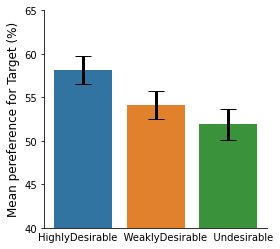

In [8]:
decoy_P_part_df = uf.partFreq_PhantomDecoyWCondition(decoy_P_df)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

sns_y1 = np.array([target_P_HD_mean, target_P_WD_mean, target_P_U_mean])
sns_x1 = ["Highly_desirable", "Weakly_desirable", "Undesirable"]
sns_error1 = np.array([target_P_HD_sem, target_P_WD_sem, target_P_U_sem])

PNBar = sns.barplot(x="PhantomCondition", y="Target_perc",
            order=["Highly_desirable", "Weakly_desirable", "Undesirable"],
            ci=None,
            ax=ax,        
            data=decoy_P_part_df) #kind="bar", ci=None,
PNBar.set(ylim=(40, 65))

sns.despine()
ax.set_xticks([])

ax.set_ylabel('Mean pereference for Target (%)', size=12)
ax.set_xlabel("HighlyDesirable  WeaklyDesirable  Undesirable", size=10)

bars = PNBar.errorbar(x=sns_x1, y=sns_y1, yerr=sns_error1)

xys = bars.lines[0].get_xydata()
xys2 = np.array([[0, 58.12], [1, 54.13], [2, 51.92]])
xys3 = np.array([[0, 58.12], [1, 0], [2, 0]])

bars.remove()

PNBar.errorbar(x=xys2[:, 0], y=[target_P_HD_mean, target_P_WD_mean, target_P_U_mean], 
               yerr=[target_P_HD_sem, target_P_WD_sem, target_P_U_sem],
              ls='', lw=3, color='black', capsize=8)


## Statistical Analysis Phantom Decoys (All items)

### All Phantom conditions One-way ANOVA

In [9]:
#One-way ANOVA "PhantomCondition" with statsmodels
PhanDecoys_Noisy_lm = ols('Target_perc ~ PhantomCondition', data=decoy_P_part_df).fit()

PhanDecoys_Noisy_table = sm.stats.anova_lm(PhanDecoys_Noisy_lm)

print(PhanDecoys_Noisy_table)

                     df        sum_sq     mean_sq         F    PR(>F)
PhantomCondition    2.0    784.838378  392.419189  3.329203  0.039104
Residual          122.0  14380.361622  117.871817       NaN       NaN


In [10]:
#One-way ANOVA "PhantomCondition" with scipy.stats
f_oneway(decoy_P_HD_freq_df["Target(%)"], decoy_P_WD_freq_df["Target(%)"], decoy_P_U_freq_df["Target(%)"])


F_onewayResult(statistic=3.329202860936702, pvalue=0.03910403517705392)

In [11]:
# Power analysis for ANOVA between Phantom groups

anova_power = stats_power.FTestAnovaPower()

anova_power.solve_power(effect_size=3.329,
                 nobs=125,
                 alpha=0.05,
                 power=None,
                 k_groups=3)

1.0

### All Coupling conditions One-way ANOVA

In [12]:
#One-way ANOVA "CouplingCondition" with statsmodels
PhanDecoys_CoupC_Noisy_lm = ols('Target_perc ~ CouplingCondition', data=decoy_P_part_df).fit()

PhanDecoys_CoupC_Noisy_table = sm.stats.anova_lm(PhanDecoys_CoupC_Noisy_lm)

print(PhanDecoys_CoupC_Noisy_table)

                      df        sum_sq     mean_sq         F    PR(>F)
CouplingCondition    1.0     16.820133   16.820133  0.136574  0.712346
Residual           123.0  15148.379867  123.157560       NaN       NaN


### Individual group testing 

##### Highly desirability and Weakly desirability (All items)

In [13]:
#Check if the two samples have the same variance.
stat_HD_WD, p_HD_WD = stats.levene(decoy_P_HD_freq_df["Target(%)"], decoy_P_WD_freq_df["Target(%)"])

print("p_HD_WD: " + str(p_HD_WD))
    
#Perform two sample t-test with equal variances
stats.ttest_ind(a=decoy_P_HD_freq_df["Target(%)"], b=decoy_P_WD_freq_df["Target(%)"], equal_var=True)


p_HD_WD: 0.9008856088928653


Ttest_indResult(statistic=1.715045377842608, pvalue=0.09002389786841232)

In [14]:
PhantNoisy_HDWD_ttest_results = ttest_ind(decoy_P_HD_freq_df["Target(%)"], decoy_P_WD_freq_df["Target(%)"], alternative="two-sided", usevar="pooled")

print("Phantom Decoy NoisyItems Highly desirable & Weakly desirable: " + "\n t-stat: " + str(round(PhantNoisy_HDWD_ttest_results[0], 3)) + "\n p-value: " + str(round(PhantNoisy_HDWD_ttest_results[1], 3)) + "\n df: " + str(round(PhantNoisy_HDWD_ttest_results[2], 3)))


Phantom Decoy NoisyItems Highly desirable & Weakly desirable: 
 t-stat: 1.715
 p-value: 0.09
 df: 84.0


In [15]:
print("Cohen's d between Highly desirability and Weakly desirability groups: ")
pg.compute_effsize(decoy_P_HD_freq_df["Target(%)"], decoy_P_WD_freq_df["Target(%)"], eftype='cohen')


Cohen's d between Highly desirability and Weakly desirability groups: 


0.3707796835965918

##### Weakly desirability and Undesirable (All items)

In [16]:
stat_U_WD, p_U_WD = stats.levene(decoy_P_U_freq_df["Target(%)"], decoy_P_WD_freq_df["Target(%)"])

print("p_U_WD: " + str(p_U_WD))

stats.ttest_ind(a=decoy_P_U_freq_df["Target(%)"], b=decoy_P_WD_freq_df["Target(%)"], equal_var=True)

p_U_WD: 0.32169253102686823


Ttest_indResult(statistic=-0.914953286406703, pvalue=0.3628666621304373)

In [17]:
PhantNoisy_WDU_ttest_results = ttest_ind(decoy_P_WD_freq_df["Target(%)"], decoy_P_U_freq_df["Target(%)"], alternative="two-sided", usevar="pooled")

print("Phantom Decoy NoisyItems Weakly desirable &  Undesirable: " + "\n t-stat: " + str(round(PhantNoisy_WDU_ttest_results[0], 3)) + "\n p-value: " + str(round(PhantNoisy_WDU_ttest_results[1], 3)) + "\n df: " + str(round(PhantNoisy_WDU_ttest_results[2], 3)))


Phantom Decoy NoisyItems Weakly desirable &  Undesirable: 
 t-stat: 0.915
 p-value: 0.363
 df: 83.0


In [18]:
print("Cohen's d between Weakly desirability and  Undesirability groups: ")
pg.compute_effsize(decoy_P_WD_freq_df["Target(%)"], decoy_P_U_freq_df["Target(%)"], eftype='cohen')

Cohen's d between Weakly desirability and  Undesirability groups: 


0.19915772879761687

##### Highly desirable and Undesirable (All items)

In [19]:
stat_HD_U, p_HD_U = stats.levene(decoy_P_HD_freq_df["Target(%)"], decoy_P_U_freq_df["Target(%)"])

print("p_HD_U: " + str(p_HD_U))

stats.ttest_ind(a=decoy_P_HD_freq_df["Target(%)"], b=decoy_P_U_freq_df["Target(%)"], equal_var=True)


p_HD_U: 0.23806287198316395


Ttest_indResult(statistic=2.575762287109483, pvalue=0.01191653907500491)

In [20]:
PhantNoisy_HDU_ttest_results = ttest_ind(decoy_P_HD_freq_df["Target(%)"], decoy_P_U_freq_df["Target(%)"], alternative="two-sided", usevar="pooled")

print("Phantom Decoy NoisyItems Highly desirable &  Undesirable: " + "\n t-stat: " + str(round(PhantNoisy_HDU_ttest_results[0], 3)) + "\n p-value: " + str(round(PhantNoisy_HDU_ttest_results[1], 3)) + "\n df: " + str(round(PhantNoisy_HDU_ttest_results[2], 3)))


Phantom Decoy NoisyItems Highly desirable &  Undesirable: 
 t-stat: 2.576
 p-value: 0.012
 df: 77.0


In [21]:
print("Cohen's d between Highly desirability and  Undesirability groups: ")
pg.compute_effsize(decoy_P_HD_freq_df["Target(%)"], decoy_P_U_freq_df["Target(%)"], eftype='cohen')

Cohen's d between Highly desirability and  Undesirability groups: 


0.5796382367675894

### Quick test on the relation between PCs and Phantom scores

In [22]:
all_classic_decoys_df = pd.read_csv("classic_decoys_scores.csv")
all_classic_decoys_with_phantoms_df = pd.read_csv("classic_decoys_scores_with_Phantoms.csv")

participants_phantom_condition_arr = np.array(all_classic_decoys_with_phantoms_df.Phantoms)

print(all_classic_decoys_df.shape)

(125, 3)


In [23]:
ClassicDecoys_PhC_wBias_df = pd.DataFrame(data={'Similarity': all_classic_decoys_df.loc[:, "Similarity"],
                  'Compromise': all_classic_decoys_df.loc[:, "Compromise"],
                  'Attraction': all_classic_decoys_df.loc[:, "Attraction"],
                  'Phantom_condition': participants_phantom_condition_arr.flatten()}, index=range(125))


ClassicDecoys_HD_wBias_df = ClassicDecoys_PhC_wBias_df.loc[ClassicDecoys_PhC_wBias_df["Phantom_condition"]=="Highly_desirable"]
ClassicDecoys_WD_wBias_df = ClassicDecoys_PhC_wBias_df.loc[ClassicDecoys_PhC_wBias_df["Phantom_condition"]=="Weakly_desirable"]
ClassicDecoys_U_wBias_df = ClassicDecoys_PhC_wBias_df.loc[ClassicDecoys_PhC_wBias_df["Phantom_condition"]=="Undesirable"]

ClassicDecoys_HD_wBias_df = ClassicDecoys_HD_wBias_df.reset_index()
ClassicDecoys_WD_wBias_df = ClassicDecoys_WD_wBias_df.reset_index()
ClassicDecoys_U_wBias_df = ClassicDecoys_U_wBias_df.reset_index()

ClassicDecoys_HD_wBias_df = ClassicDecoys_HD_wBias_df.drop(["Phantom_condition", "index"], axis=1)
ClassicDecoys_WD_wBias_df = ClassicDecoys_WD_wBias_df.drop(["Phantom_condition", "index"], axis=1)
ClassicDecoys_U_wBias_df = ClassicDecoys_U_wBias_df.drop(["Phantom_condition", "index"], axis=1)

ClassicDecoys_HD_wBias_df.head()

,Similarity,Compromise,Attraction
0,0.000000,0.928571,0.777778
1,0.400000,0.466667,0.444444
2,0.083333,0.866667,0.875000
3,0.166667,0.500000,0.888889
4,0.111111,0.642857,0.500000


In [24]:
pca = PCA(n_components=2)

#

principalComponents_HD_wBias = pca.fit_transform(ClassicDecoys_HD_wBias_df)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.62225284 0.20086019]
0.8231130299218359


In [25]:
#
principalComponents_WD_wBias = pca.fit_transform(ClassicDecoys_WD_wBias_df)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


[0.57386637 0.26566176]
0.8395281382713429


In [26]:
#
principalComponents_U_wBias = pca.fit_transform(ClassicDecoys_U_wBias_df)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.7068183  0.18297016]
0.88978845473891


In [27]:
# Calculate, phantom choice share scores

HD_scores_all = []
WD_scores_all = []
U_scores_all = []

HD_PIDs = decoy_P_HD_df["Survey_ID"].unique()
WD_PIDs = decoy_P_WD_df["Survey_ID"].unique()
U_PIDs = decoy_P_U_df["Survey_ID"].unique()

for x in HD_PIDs:
    
    HD_score = decoy_P_HD_freq_df[decoy_P_HD_freq_df["PID"] == x]["Target(%)"]/(decoy_P_HD_freq_df[decoy_P_HD_freq_df["PID"] == x]["Competitor(%)"] + decoy_P_HD_freq_df[decoy_P_HD_freq_df["PID"] == x]["Target(%)"])
    HD_scores_all.append(HD_score)
    
for x in WD_PIDs:
    
    WD_score = decoy_P_WD_freq_df[decoy_P_WD_freq_df["PID"] == x]["Target(%)"]/(decoy_P_WD_freq_df[decoy_P_WD_freq_df["PID"] == x]["Competitor(%)"] + decoy_P_WD_freq_df[decoy_P_WD_freq_df["PID"] == x]["Target(%)"])
    WD_scores_all.append(WD_score)
    
for x in U_PIDs:
    
    U_score = decoy_P_U_freq_df[decoy_P_U_freq_df["PID"] == x]["Target(%)"]/(decoy_P_U_freq_df[decoy_P_U_freq_df["PID"] == x]["Competitor(%)"] + decoy_P_U_freq_df[decoy_P_U_freq_df["PID"] == x]["Target(%)"])
    U_scores_all.append(U_score)
    
HD_scores_all = np.array(HD_scores_all).flatten()
WD_scores_all = np.array(WD_scores_all).flatten()
U_scores_all = np.array(U_scores_all).flatten()

print(HD_scores_all.shape)
print(WD_scores_all.shape)
print(U_scores_all.shape)


(40,)
(46,)
(39,)


In [28]:
PCs_HD_wBias_df = pd.DataFrame(data={'PC1': principalComponents_HD_wBias[:, 0].flatten(),
                  'PC2': principalComponents_HD_wBias[:, 1].flatten(),
                  'Phantom_scores': HD_scores_all}, index=range(40))

PCs_WD_wBias_df = pd.DataFrame(data={'PC1': principalComponents_WD_wBias[:, 0].flatten(),
                  'PC2': principalComponents_WD_wBias[:, 1].flatten(),
                  'Phantom_scores': WD_scores_all}, index=range(46))

PCs_U_wBias_df = pd.DataFrame(data={'PC1': principalComponents_U_wBias[:, 0].flatten(),
                  'PC2': principalComponents_U_wBias[:, 1].flatten(),
                  'Phantom_scores': U_scores_all}, index=range(39))

In [29]:
PC1_HD_wBias_corr = stats.pearsonr(PCs_HD_wBias_df["PC1"], PCs_HD_wBias_df["Phantom_scores"])
PC1_WD_wBias_corr = stats.pearsonr(PCs_WD_wBias_df["PC1"], PCs_WD_wBias_df["Phantom_scores"])
PC1_U_wBias_corr = stats.pearsonr(PCs_U_wBias_df["PC1"], PCs_U_wBias_df["Phantom_scores"])

print("Correlation coefficient PC1-Phantom HD scores: " + str(round(PC1_HD_wBias_corr[0], 2)) + ", p-value: " + str(PC1_HD_wBias_corr[1]))
print("Correlation coefficient PC1-Phantom WD scores: " + str(round(PC1_WD_wBias_corr[0], 2)) + ", p-value: " + str(PC1_WD_wBias_corr[1]))
print("Correlation coefficient PC1-Phantom U scores: " + str(round(PC1_U_wBias_corr[0], 2)) + ", p-value: " + str(PC1_U_wBias_corr[1]))

PC2_HD_wBias_corr = stats.pearsonr(PCs_HD_wBias_df["PC2"], PCs_HD_wBias_df["Phantom_scores"])
PC2_WD_wBias_corr = stats.pearsonr(PCs_WD_wBias_df["PC2"], PCs_WD_wBias_df["Phantom_scores"])
PC2_U_wBias_corr = stats.pearsonr(PCs_U_wBias_df["PC2"], PCs_U_wBias_df["Phantom_scores"])

print("\nCorrelation coefficient PC2-Phantom HD scores: " + str(round(PC2_HD_wBias_corr[0], 2)) + ", p-value: " + str(PC2_HD_wBias_corr[1]))
print("Correlation coefficient PC2-Phantom WD scores: " + str(round(PC2_WD_wBias_corr[0], 2)) + ", p-value: " + str(PC2_WD_wBias_corr[1]))
print("Correlation coefficient PC2-Phantom U scores: " + str(round(PC2_U_wBias_corr[0], 2)) + ", p-value: " + str(PC2_U_wBias_corr[1]))


Correlation coefficient PC1-Phantom HD scores: -0.11, p-value: 0.4808323825604469
Correlation coefficient PC1-Phantom WD scores: -0.04, p-value: 0.7674852845157104
Correlation coefficient PC1-Phantom U scores: -0.27, p-value: 0.09409379587216316

Correlation coefficient PC2-Phantom HD scores: 0.03, p-value: 0.8674261377613717
Correlation coefficient PC2-Phantom WD scores: 0.33, p-value: 0.025609080762267904
Correlation coefficient PC2-Phantom U scores: 0.11, p-value: 0.5227595769254286


Text(0.5, 1.0, 'PC1 vs. Phantom_U')

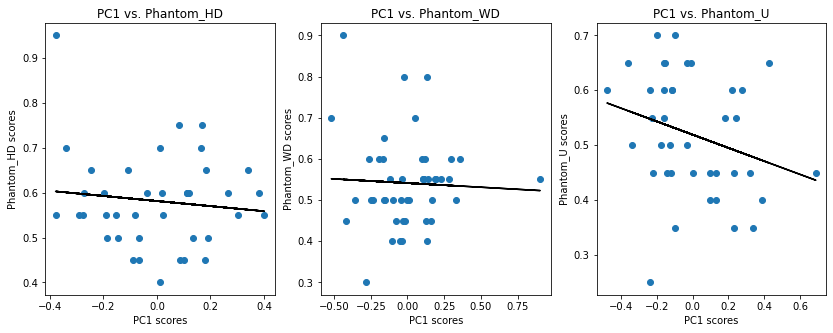

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

ax[0].scatter(PCs_HD_wBias_df["PC1"], PCs_HD_wBias_df["Phantom_scores"])
a_0, b_0 = np.polyfit(np.array(PCs_HD_wBias_df["PC1"]).flatten(), np.array(PCs_HD_wBias_df["Phantom_scores"]).flatten(), 1)
ax[0].plot(PCs_HD_wBias_df["PC1"], a_0*PCs_HD_wBias_df["PC1"]+b_0, color='black')  
ax[0].set_xlabel("PC1 scores")
ax[0].set_ylabel("Phantom_HD scores")
ax[0].set_title("PC1 vs. Phantom_HD")

ax[1].scatter(PCs_WD_wBias_df["PC1"], PCs_WD_wBias_df["Phantom_scores"])
a_1, b_1 = np.polyfit(np.array(PCs_WD_wBias_df["PC1"]).flatten(), np.array(PCs_WD_wBias_df["Phantom_scores"]).flatten(), 1)
ax[1].plot(PCs_WD_wBias_df["PC1"], a_1*PCs_WD_wBias_df["PC1"]+b_1, color='black')  
ax[1].set_xlabel("PC1 scores")
ax[1].set_ylabel("Phantom_WD scores")
ax[1].set_title("PC1 vs. Phantom_WD")

ax[2].scatter(PCs_U_wBias_df["PC1"], PCs_U_wBias_df["Phantom_scores"])
a_2, b_2 = np.polyfit(np.array(PCs_U_wBias_df["PC1"]).flatten(), np.array(PCs_U_wBias_df["Phantom_scores"]).flatten(), 1)
ax[2].plot(PCs_U_wBias_df["PC1"], a_2*PCs_U_wBias_df["PC1"]+b_2, color='black')  
ax[2].set_xlabel("PC1 scores")
ax[2].set_ylabel("Phantom_U scores")
ax[2].set_title("PC1 vs. Phantom_U")

Text(0.5, 1.0, 'PC2 vs. Phantom_U')

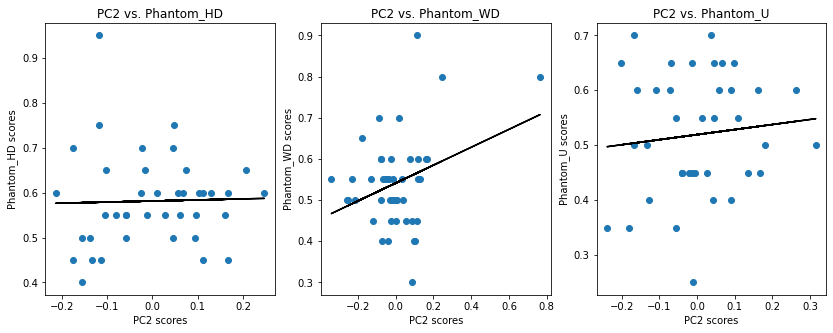

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

ax[0].scatter(PCs_HD_wBias_df["PC2"], PCs_HD_wBias_df["Phantom_scores"])
a_0, b_0 = np.polyfit(np.array(PCs_HD_wBias_df["PC2"]).flatten(), np.array(PCs_HD_wBias_df["Phantom_scores"]).flatten(), 1)
ax[0].plot(PCs_HD_wBias_df["PC2"], a_0*PCs_HD_wBias_df["PC2"]+b_0, color='black')  
ax[0].set_xlabel("PC2 scores")
ax[0].set_ylabel("Phantom_HD scores")
ax[0].set_title("PC2 vs. Phantom_HD")

ax[1].scatter(PCs_WD_wBias_df["PC2"], PCs_WD_wBias_df["Phantom_scores"])
a_1, b_1 = np.polyfit(np.array(PCs_WD_wBias_df["PC2"]).flatten(), np.array(PCs_WD_wBias_df["Phantom_scores"]).flatten(), 1)
ax[1].plot(PCs_WD_wBias_df["PC2"], a_1*PCs_WD_wBias_df["PC2"]+b_1, color='black')  
ax[1].set_xlabel("PC2 scores")
ax[1].set_ylabel("Phantom_WD scores")
ax[1].set_title("PC2 vs. Phantom_WD")

ax[2].scatter(PCs_U_wBias_df["PC2"], PCs_U_wBias_df["Phantom_scores"])
a_2, b_2 = np.polyfit(np.array(PCs_U_wBias_df["PC2"]).flatten(), np.array(PCs_U_wBias_df["Phantom_scores"]).flatten(), 1)
ax[2].plot(PCs_U_wBias_df["PC2"], a_2*PCs_U_wBias_df["PC2"]+b_2, color='black')  
ax[2].set_xlabel("PC2 scores")
ax[2].set_ylabel("Phantom_U scores")
ax[2].set_title("PC2 vs. Phantom_U")

#### PCA (Classic decoys + phantoms)

In [32]:
# Create new Dataframes with all information.

ClassicDecoys_Phantoms_HD_wB_df = ClassicDecoys_HD_wBias_df.copy()
ClassicDecoys_Phantoms_HD_wB_df["Phantom_scores"] = HD_scores_all

ClassicDecoys_Phantoms_WD_wB_df = ClassicDecoys_WD_wBias_df.copy()
ClassicDecoys_Phantoms_WD_wB_df["Phantom_scores"] = WD_scores_all

ClassicDecoys_Phantoms_U_wB_df = ClassicDecoys_U_wBias_df.copy()
ClassicDecoys_Phantoms_U_wB_df["Phantom_scores"] = U_scores_all


In [33]:
# Create a new PCA object.

pca2 = PCA(n_components=3)


In [34]:
principalComponents_ClassicD_HD_wBias = pca2.fit_transform(ClassicDecoys_Phantoms_HD_wB_df)

print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

[0.5425869 0.1748798 0.1600035]
0.8774702015697994


In [35]:
principalComponents_ClassicD_WD_wBias = pca2.fit_transform(ClassicDecoys_Phantoms_WD_wB_df)

print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

[0.51437725 0.25613074 0.15036418]
0.9208721618565189


In [36]:
principalComponents_ClassicD_U_wBias = pca2.fit_transform(ClassicDecoys_Phantoms_U_wB_df)

print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))


[0.63139813 0.16460074 0.10771232]
0.9037111880503785


## Phantom Decoys (Filtered Items)

In [37]:
# Items filtered for each group.
print("In the following analyses, only the following items were included:\n " + "Baby stroller, " + "Dehumidifier, " + "Electric mop, " + "Organic fertilizer, " + "Paint sprayer, " + "Wifi extender.")



In the following analyses, only the following items were included:
 Baby stroller, Dehumidifier, Electric mop, Organic fertilizer, Paint sprayer, Wifi extender.


### Highly Desirable Condition

In [38]:
decoy_P_HD_CI_df = decoy_P_HD_df.loc[(decoy_P_HD_df["Item"]=="Baby stroller") | (decoy_P_HD_df["Item"]=="Dehumidifier") | (decoy_P_HD_df["Item"]=="Electric mop") | (decoy_P_HD_df["Item"]=="Organic fertilizer") | (decoy_P_HD_df["Item"]=="Paint sprayer") | (decoy_P_HD_df["Item"]=="Wifi extender")] 
decoy_P_HD_df_LowC = decoy_P_HD_CI_df[decoy_P_HD_CI_df["CouplingCondition"] == "Low coupling"]
decoy_P_HD_df_HighC = decoy_P_HD_CI_df[decoy_P_HD_CI_df["CouplingCondition"] == "High coupling"]

#"Baby stroller", "Dehumidifier", "Electric mop", "Organic fertilizer", "Paint sprayer", "Wifi extender"

decoy_P_HD_freq_CI_df = uf.partFreq_PhantomDecoy(decoy_P_HD_CI_df)
decoy_P_HD_LowC_freq_CI_df = uf.partFreq_PhantomDecoy(decoy_P_HD_df_LowC)
decoy_P_HD_HighC_freq_CI_df = uf.partFreq_PhantomDecoy(decoy_P_HD_df_HighC)

total_n = decoy_P_HD_df["Survey_ID"].unique()
number_of_low_coupling = decoy_P_HD_df_LowC["Survey_ID"].unique()
number_of_high_coupling = decoy_P_HD_df_HighC["Survey_ID"].unique()

total_n = int(len(total_n))
number_of_low_coupling = int(len(number_of_low_coupling))
number_of_high_coupling = int(len(number_of_high_coupling))

# Get mean, std, and sem for all participatns.
target_P_HD_CI_mean, target_P_HD_CI_std, target_P_HD_CI_sem = uf.get_decoy_stats(decoy_P_HD_freq_CI_df, "Target(%)", total_n)
competitor_P_HD_CI_mean, competitor_P_HD_CI_std, competitor_P_HD_CI_sem = uf.get_decoy_stats(decoy_P_HD_freq_CI_df, "Competitor(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_P_HD_LowC_CI_mean, target_P_HD_LowC_CI_std, target_P_HD_LowC_CI_sem = uf.get_decoy_stats(decoy_P_HD_LowC_freq_CI_df, "Target(%)", number_of_low_coupling)
competitor_P_HD_LowC_CI_mean, competitor_P_HD_LowC_CI_std, competitor_P_HD_LowC_CI_sem = uf.get_decoy_stats(decoy_P_HD_LowC_freq_CI_df, "Competitor(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_P_HD_HighC_CI_mean, target_P_HD_HighC_CI_std, target_P_HD_HighC_CI_sem = uf.get_decoy_stats(decoy_P_HD_HighC_freq_CI_df, "Target(%)", number_of_high_coupling)
competitor_P_HD_HighC_CI_mean, competitor_P_HD_HighC_CI_std, competitor_P_HD_HighC_CI_sem = uf.get_decoy_stats(decoy_P_HD_HighC_freq_CI_df, "Competitor(%)", number_of_high_coupling)

P_HD_summary_df = pd.DataFrame({'Target mean(%)': [target_P_HD_CI_mean, target_P_HD_LowC_CI_mean, target_P_HD_HighC_CI_mean],
                  'Target sem(%)': [target_P_HD_CI_sem, target_P_HD_LowC_CI_sem, target_P_HD_HighC_CI_sem],
                  'Comp mean(%)': [competitor_P_HD_CI_mean, competitor_P_HD_LowC_CI_mean, competitor_P_HD_HighC_CI_mean],
                  'Comp sem(%)': [competitor_P_HD_CI_sem, competitor_P_HD_LowC_CI_sem, competitor_P_HD_HighC_CI_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

P_HD_summary_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
All,59.38,1.98,40.62,1.98
LowCoupling,58.33,2.99,41.67,2.99
HighCoupling,60.32,2.69,39.68,2.69


### Weakly Desirable Condition

In [39]:
decoy_P_WD_CI_df = decoy_P_WD_df.loc[(decoy_P_WD_df["Item"]=="Baby stroller") | (decoy_P_WD_df["Item"]=="Dehumidifier") | (decoy_P_WD_df["Item"]=="Electric mop") | (decoy_P_WD_df["Item"]=="Organic fertilizer") | (decoy_P_WD_df["Item"]=="Paint sprayer") | (decoy_P_WD_df["Item"]=="Wifi extender")]
decoy_P_WD_df_LowC = decoy_P_WD_CI_df[decoy_P_WD_CI_df["CouplingCondition"] == "Low coupling"]
decoy_P_WD_df_HighC = decoy_P_WD_CI_df[decoy_P_WD_CI_df["CouplingCondition"] == "High coupling"]

decoy_P_WD_freq_CI_df = uf.partFreq_PhantomDecoy(decoy_P_WD_CI_df)
decoy_P_WD_LowC_freq_CI_df = uf.partFreq_PhantomDecoy(decoy_P_WD_df_LowC)
decoy_P_WD_HighC_freq_CI_df = uf.partFreq_PhantomDecoy(decoy_P_WD_df_HighC)

total_n = decoy_P_WD_df["Survey_ID"].unique()
number_of_low_coupling = decoy_P_WD_df_LowC["Survey_ID"].unique()
number_of_high_coupling = decoy_P_WD_df_HighC["Survey_ID"].unique()

total_n = int(len(total_n))
number_of_low_coupling = int(len(number_of_low_coupling))
number_of_high_coupling = int(len(number_of_high_coupling))

# Get mean, std, and sem for all participatns.
target_P_WD_CI_mean, target_P_WD_CI_std, target_P_WD_CI_sem = uf.get_decoy_stats(decoy_P_WD_freq_CI_df, "Target(%)", total_n)
competitor_P_WD_CI_mean, competitor_P_WD_CI_std, competitor_P_WD_CI_sem = uf.get_decoy_stats(decoy_P_WD_freq_CI_df, "Competitor(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_P_WD_LowC_CI_mean, target_P_WD_LowC_CI_std, target_P_WD_LowC_CI_sem = uf.get_decoy_stats(decoy_P_WD_LowC_freq_CI_df, "Target(%)", number_of_low_coupling)
competitor_P_WD_LowC_CI_mean, competitor_P_WD_LowC_CI_std, competitor_P_WD_LowC_CI_sem = uf.get_decoy_stats(decoy_P_WD_LowC_freq_CI_df, "Competitor(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_P_WD_HighC_CI_mean, target_P_WD_HighC_CI_std, target_P_WD_HighC_CI_sem = uf.get_decoy_stats(decoy_P_WD_HighC_freq_CI_df, "Target(%)", number_of_high_coupling)
competitor_P_WD_HighC_CI_mean, competitor_P_WD_HighC_CI_std, competitor_P_WD_HighC_CI_sem = uf.get_decoy_stats(decoy_P_WD_HighC_freq_CI_df, "Competitor(%)", number_of_high_coupling)

P_WD_summary_df = pd.DataFrame({'Target mean(%)': [target_P_WD_CI_mean, target_P_WD_LowC_CI_mean, target_P_WD_HighC_CI_mean],
                  'Target sem(%)': [target_P_WD_CI_sem, target_P_WD_LowC_CI_sem, target_P_WD_HighC_CI_sem],
                  'Comp mean(%)': [competitor_P_WD_CI_mean, competitor_P_WD_LowC_CI_mean, competitor_P_WD_HighC_CI_mean],
                  'Comp sem(%)': [competitor_P_WD_CI_sem, competitor_P_WD_LowC_CI_sem, competitor_P_WD_HighC_CI_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

P_WD_summary_df.head()


,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
All,53.99,2.22,46.01,2.22
LowCoupling,52.31,3.55,47.69,3.55
HighCoupling,55.06,2.89,44.94,2.89


### Undesirable Condition

In [40]:
decoy_P_U_CI_df = decoy_P_U_df.loc[(decoy_P_U_df["Item"]=="Baby stroller") | (decoy_P_U_df["Item"]=="Dehumidifier") | (decoy_P_U_df["Item"]=="Electric mop") | (decoy_P_U_df["Item"]=="Organic fertilizer") | (decoy_P_U_df["Item"]=="Paint sprayer") | (decoy_P_U_df["Item"]=="Wifi extender")]
decoy_P_U_df_LowC = decoy_P_U_CI_df[decoy_P_U_CI_df["CouplingCondition"] == "Low coupling"]
decoy_P_U_df_HighC = decoy_P_U_CI_df[decoy_P_U_CI_df["CouplingCondition"] == "High coupling"]

decoy_P_U_freq_CI_df = uf.partFreq_PhantomDecoy(decoy_P_U_CI_df)
decoy_P_U_LowC_freq_CI_df = uf.partFreq_PhantomDecoy(decoy_P_U_df_LowC)
decoy_P_U_HighC_freq_CI_df = uf.partFreq_PhantomDecoy(decoy_P_U_df_HighC)

total_n = decoy_P_U_df["Survey_ID"].unique()
number_of_low_coupling = decoy_P_U_df_LowC["Survey_ID"].unique()
number_of_high_coupling = decoy_P_U_df_HighC["Survey_ID"].unique()

total_n = int(len(total_n))
number_of_low_coupling = int(len(number_of_low_coupling))
number_of_high_coupling = int(len(number_of_high_coupling))

# Get mean, std, and sem for all participatns.
target_P_U_CI_mean, target_P_U_CI_std, target_P_U_CI_sem = uf.get_decoy_stats(decoy_P_U_freq_CI_df, "Target(%)", total_n)
competitor_P_U_CI_mean, competitor_P_U_CI_std, competitor_P_U_CI_sem = uf.get_decoy_stats(decoy_P_U_freq_CI_df, "Competitor(%)", total_n)

# Get mean, std, and sem for 'Low coupling' participatns.
target_P_U_LowC_CI_mean, target_P_U_LowC_CI_std, target_P_U_LowC_CI_sem = uf.get_decoy_stats(decoy_P_U_LowC_freq_CI_df, "Target(%)", number_of_low_coupling)
competitor_P_U_LowC_CI_mean, competitor_P_U_LowC_CI_std, competitor_P_U_LowC_CI_sem = uf.get_decoy_stats(decoy_P_U_LowC_freq_CI_df, "Competitor(%)", number_of_low_coupling)

# Get mean, std, and sem for 'High coupling' participatns.
target_P_U_HighC_CI_mean, target_P_U_HighC_CI_std, target_P_U_HighC_CI_sem = uf.get_decoy_stats(decoy_P_U_HighC_freq_CI_df, "Target(%)", number_of_high_coupling)
competitor_P_U_HighC_CI_mean, competitor_P_U_HighC_CI_std, competitor_P_U_HighC_CI_sem = uf.get_decoy_stats(decoy_P_U_HighC_freq_CI_df, "Competitor(%)", number_of_high_coupling)

P_U_summary_df = pd.DataFrame({'Target mean(%)': [target_P_U_CI_mean, target_P_U_LowC_CI_mean, target_P_U_HighC_CI_mean],
                  'Target sem(%)': [target_P_U_CI_sem, target_P_U_LowC_CI_sem, target_P_U_HighC_CI_sem],
                  'Comp mean(%)': [competitor_P_U_CI_mean, competitor_P_U_LowC_CI_mean, competitor_P_U_HighC_CI_mean],
                  'Comp sem(%)': [competitor_P_U_CI_sem, competitor_P_U_LowC_CI_sem, competitor_P_U_HighC_CI_sem]},
                  index=["All", "LowCoupling", "HighCoupling"])

P_U_summary_df.head()

,Target mean(%),Target sem(%),Comp mean(%),Comp sem(%)
All,50.64,2.48,49.36,2.48
LowCoupling,50.69,3.09,49.31,3.09
HighCoupling,50.56,4.26,49.44,4.26


<ErrorbarContainer object of 3 artists>

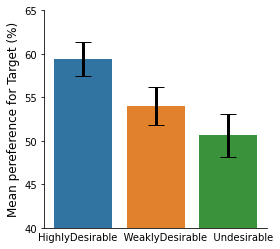

In [41]:
decoy_P_CI_df = decoy_P_df.loc[(decoy_P_df["Item"]=="Baby stroller") | (decoy_P_df["Item"]=="Dehumidifier") | (decoy_P_df["Item"]=="Electric mop") | (decoy_P_df["Item"]=="Organic fertilizer") | (decoy_P_df["Item"]=="Paint sprayer") | (decoy_P_df["Item"]=="Wifi extender")] 
#"Baby stroller", "Dehumidifier", "Electric mop", "Organic fertilizer", "Paint sprayer", "Wifi extender"
filtered_decoy_P_part_df = uf.partFreq_PhantomDecoyWCondition(decoy_P_CI_df)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

sns_y2 = np.array([target_P_HD_CI_mean, target_P_WD_CI_mean, target_P_U_CI_mean])
sns_x2 = ["Highly_desirable", "Weakly_desirable", "Undesirable"]
sns_error2 = np.array([target_P_HD_CI_sem, target_P_WD_CI_sem, target_P_U_CI_sem])

PNBar2 = sns.barplot(x="PhantomCondition", y="Target_perc",
            order=["Highly_desirable", "Weakly_desirable", "Undesirable"],
            ci=None,
            ax=ax,        
            data=filtered_decoy_P_part_df) 
PNBar2.set(ylim=(40, 65))

sns.despine()
ax.set_xticks([])

ax.set_ylabel('Mean pereference for Target (%)', size=12)
ax.set_xlabel("HighlyDesirable  WeaklyDesirable  Undesirable", size=10)

bars2 = PNBar2.errorbar(x=sns_x2, y=sns_y2, yerr=sns_error2)

xys = bars2.lines[0].get_xydata()
xys2 = np.array([[0, 59.38], [1, 56.43], [2, 51.92]])
#xys3 = np.array([[0, 58.12], [1, 0], [2, 0]])

bars2.remove()

PNBar2.errorbar(x=xys2[:, 0], y=[target_P_HD_CI_mean, target_P_WD_CI_mean, target_P_U_CI_mean], 
               yerr=[target_P_HD_CI_sem, target_P_WD_CI_sem, target_P_U_CI_sem],
              ls='', lw=3, color='black', capsize=8)


## Statistical Analysis Phantom Decoys (Filtered items)

#### All conditions One-way ANOVA

In [42]:
#One-way ANOVA "PhantomCondition" with statsmodels
PhanDecoys_FilteredI_lm = ols('Target_perc ~ PhantomCondition', data=filtered_decoy_P_part_df).fit()

PhanDecoys_FilteredI_table = sm.stats.anova_lm(PhanDecoys_FilteredI_lm)

print(PhanDecoys_FilteredI_table)

                     df        sum_sq     mean_sq         F    PR(>F)
PhantomCondition    2.0   1540.104747  770.052374  3.689975  0.027801
Residual          122.0  25459.895253  208.687666       NaN       NaN


In [43]:
# One-way ANOVA 

f_oneway(decoy_P_HD_freq_CI_df["Target(%)"], decoy_P_WD_freq_CI_df["Target(%)"], decoy_P_U_freq_CI_df["Target(%)"])


F_onewayResult(statistic=3.6899754949193877, pvalue=0.027801213405628928)

In [44]:
anova_power.solve_power(effect_size=3.3604,
                 nobs=125,
                 alpha=0.05,
                 power=None,
                 k_groups=3)

1.0

### Individual group testing 

##### Highly desirability and Weakly desirability (Filtered items)

In [45]:
#Perform two sample t-test with equal variances
stat_HD_WD_CI, p_HD_WD_CI = stats.levene(decoy_P_HD_freq_CI_df["Target(%)"], decoy_P_WD_freq_CI_df["Target(%)"])

print("p_HD_WD_CI: " + str(p_HD_WD_CI))

stats.ttest_ind(a=decoy_P_HD_freq_CI_df["Target(%)"], b=decoy_P_WD_freq_CI_df["Target(%)"], equal_var=True)


p_HD_WD_CI: 0.4861153187812446


Ttest_indResult(statistic=1.7852848713051646, pvalue=0.0778246678350086)

In [46]:
PhantLessNoisy_HDWD_ttest_results = ttest_ind(decoy_P_HD_freq_CI_df["Target(%)"], decoy_P_WD_freq_CI_df["Target(%)"], alternative="two-sided", usevar="pooled")

print("Phantom Decoy Filtered items Highly desirable & Weakly desirable: " + "\n t-stat: " + str(round(PhantLessNoisy_HDWD_ttest_results[0], 3)) + "\n p-value: " + str(round(PhantLessNoisy_HDWD_ttest_results[1], 3)) + "\n df: " + str(round(PhantLessNoisy_HDWD_ttest_results[2], 3)))


Phantom Decoy Filtered items Highly desirable & Weakly desirable: 
 t-stat: 1.785
 p-value: 0.078
 df: 84.0


In [47]:
print("Cohen's d between Highly desirable and Weakly desirable groups: ")
pg.compute_effsize(decoy_P_HD_freq_CI_df["Target(%)"], decoy_P_WD_freq_CI_df["Target(%)"], eftype='cohen')

Cohen's d between Highly desirable and Weakly desirable groups: 


0.3859649244645577

##### Weakly desirability and Undesirable (Filtered items)

In [48]:
stat_WD_U_CI, p_WD_U_CI = stats.levene(decoy_P_WD_freq_CI_df["Target(%)"], decoy_P_U_freq_CI_df["Target(%)"])

print("p_WD_U_CI: " + str(p_WD_U_CI))

stats.ttest_ind(a=decoy_P_WD_freq_CI_df["Target(%)"], b=decoy_P_U_freq_CI_df["Target(%)"], equal_var=True)

p_WD_U_CI: 0.8465510764106734


Ttest_indResult(statistic=1.0070133578907698, pvalue=0.31685513819080835)

In [49]:
PhantLessNoisy_WDU_ttest_results = ttest_ind(decoy_P_WD_freq_CI_df["Target(%)"], decoy_P_U_freq_CI_df["Target(%)"], alternative="two-sided", usevar="pooled")

print("Phantom Decoy Filtered items Weakly desirable & Undesirable: " + "\n t-stat: " + str(round(PhantLessNoisy_WDU_ttest_results[0], 3)) + "\n p-value: " + str(round(PhantLessNoisy_WDU_ttest_results[1], 3)) + "\n df: " + str(round(PhantLessNoisy_WDU_ttest_results[2], 3)))


Phantom Decoy Filtered items Weakly desirable & Undesirable: 
 t-stat: 1.007
 p-value: 0.317
 df: 83.0


In [50]:
print("Cohen's d between Weakly desirable and Undesirable groups: ")
pg.compute_effsize(decoy_P_WD_freq_CI_df["Target(%)"], decoy_P_U_freq_CI_df["Target(%)"], eftype='cohen')

Cohen's d between Weakly desirable and Undesirable groups: 


0.21919642915762977

##### Highly desirability and  Undesirable (Filtered items)

In [51]:
stat_HD_U_CI, p_HD_U_CI = stats.levene(decoy_P_HD_freq_CI_df["Target(%)"], decoy_P_U_freq_CI_df["Target(%)"])

print("p_HD_U_CI: " + str(p_HD_U_CI))

stats.ttest_ind(a=decoy_P_HD_freq_CI_df["Target(%)"], b=decoy_P_U_freq_CI_df["Target(%)"], equal_var=True)

p_HD_U_CI: 0.3580164315313523


Ttest_indResult(statistic=2.76071931565676, pvalue=0.007206016091071648)

In [52]:
PhantLessNoisy_HDU_ttest_results = ttest_ind(decoy_P_HD_freq_CI_df["Target(%)"], decoy_P_U_freq_CI_df["Target(%)"], alternative="two-sided", usevar="pooled")

print("Phantom Decoy Filtered items Highly desirable & Undesirable: " + "\n t-stat: " + str(round(PhantLessNoisy_HDU_ttest_results[0], 3)) + "\n p-value: " + str(round(PhantLessNoisy_HDU_ttest_results[1], 3)) + "\n df: " + str(round(PhantLessNoisy_HDU_ttest_results[2], 3)))


Phantom Decoy Filtered items Highly desirable & Undesirable: 
 t-stat: 2.761
 p-value: 0.007
 df: 77.0


In [53]:
print("Cohen's d between Highly desirable and Undesirable groups: ")
pg.compute_effsize(decoy_P_HD_freq_CI_df["Target(%)"], decoy_P_U_freq_CI_df["Target(%)"], eftype='cohen')

Cohen's d between Highly desirable and Undesirable groups: 


0.6212601544583035

### Quick test on the relation between PCs and Phantom scores (Filtered items)

In [54]:
# Calculate, phantom choice share scores

HD_scores_CI_all = []
WD_scores_CI_all = []
U_scores_CI_all = []

for x in HD_PIDs:
    
    HD_score = decoy_P_HD_freq_CI_df[decoy_P_HD_freq_CI_df["PID"] == x]["Target(%)"]/(decoy_P_HD_freq_CI_df[decoy_P_HD_freq_CI_df["PID"] == x]["Competitor(%)"] + decoy_P_HD_freq_CI_df[decoy_P_HD_freq_CI_df["PID"] == x]["Target(%)"])
    HD_scores_CI_all.append(HD_score)
    
for x in WD_PIDs:
    
    WD_score = decoy_P_WD_freq_CI_df[decoy_P_WD_freq_CI_df["PID"] == x]["Target(%)"]/(decoy_P_WD_freq_CI_df[decoy_P_WD_freq_CI_df["PID"] == x]["Competitor(%)"] + decoy_P_WD_freq_CI_df[decoy_P_WD_freq_CI_df["PID"] == x]["Target(%)"])
    WD_scores_CI_all.append(WD_score)
    
for x in U_PIDs:
    
    U_score = decoy_P_U_freq_CI_df[decoy_P_U_freq_CI_df["PID"] == x]["Target(%)"]/(decoy_P_U_freq_CI_df[decoy_P_U_freq_CI_df["PID"] == x]["Competitor(%)"] + decoy_P_U_freq_CI_df[decoy_P_U_freq_CI_df["PID"] == x]["Target(%)"])
    U_scores_CI_all.append(U_score)
    
HD_scores_CI_all = np.array(HD_scores_CI_all).flatten()
WD_scores_CI_all = np.array(WD_scores_CI_all).flatten()
U_scores_CI_all = np.array(U_scores_CI_all).flatten()

print(HD_scores_CI_all.shape)
print(WD_scores_CI_all.shape)
print(U_scores_CI_all.shape)


(40,)
(46,)
(39,)


In [55]:
PCs_HD_df = pd.DataFrame(data={'PC1': principalComponents_HD_wBias[:, 0].flatten(),
                  'PC2': principalComponents_HD_wBias[:, 1].flatten(),
                  'Phantom_scores': HD_scores_CI_all}, index=range(40))

PCs_WD_df = pd.DataFrame(data={'PC1': principalComponents_WD_wBias[:, 0].flatten(),
                  'PC2': principalComponents_WD_wBias[:, 1].flatten(),
                  'Phantom_scores': WD_scores_CI_all}, index=range(46))

PCs_U_df = pd.DataFrame(data={'PC1': principalComponents_U_wBias[:, 0].flatten(),
                  'PC2': principalComponents_U_wBias[:, 1].flatten(),
                  'Phantom_scores': U_scores_CI_all}, index=range(39))


In [56]:
PC1_HD_corr = stats.pearsonr(PCs_HD_df["PC1"], PCs_HD_df["Phantom_scores"])
PC1_WD_corr = stats.pearsonr(PCs_WD_df["PC1"], PCs_WD_df["Phantom_scores"])
PC1_U_corr = stats.pearsonr(PCs_U_df["PC1"], PCs_U_df["Phantom_scores"])

print("Correlation coefficient PC1-Phantom HD scores: " + str(round(PC1_HD_corr[0], 2)) + ", p-value: " + str(PC1_HD_corr[1]))
print("Correlation coefficient PC1-Phantom WD scores: " + str(round(PC1_WD_corr[0], 2)) + ", p-value: " + str(PC1_WD_corr[1]))
print("Correlation coefficient PC1-Phantom U scores: " + str(round(PC1_U_corr[0], 2)) + ", p-value: " + str(PC1_U_corr[1]))

PC2_HD_corr = stats.pearsonr(PCs_HD_df["PC2"], PCs_HD_df["Phantom_scores"])
PC2_WD_corr = stats.pearsonr(PCs_WD_df["PC2"], PCs_WD_df["Phantom_scores"])
PC2_U_corr = stats.pearsonr(PCs_U_df["PC2"], PCs_U_df["Phantom_scores"])

print("\nCorrelation coefficient PC2-Phantom HD scores: " + str(round(PC2_HD_corr[0], 2)) + ", p-value: " + str(PC2_HD_corr[1]))
print("Correlation coefficient PC2-Phantom WD scores: " + str(round(PC2_WD_corr[0], 2)) + ", p-value: " + str(PC2_WD_corr[1]))
print("Correlation coefficient PC2-Phantom U scores: " + str(round(PC2_U_corr[0], 2)) + ", p-value: " + str(PC2_U_corr[1]))


Correlation coefficient PC1-Phantom HD scores: -0.22, p-value: 0.1806170807579985
Correlation coefficient PC1-Phantom WD scores: -0.06, p-value: 0.7009941379841506
Correlation coefficient PC1-Phantom U scores: -0.25, p-value: 0.132098868734454

Correlation coefficient PC2-Phantom HD scores: -0.05, p-value: 0.7692942683601833
Correlation coefficient PC2-Phantom WD scores: 0.21, p-value: 0.1629436167725737
Correlation coefficient PC2-Phantom U scores: 0.2, p-value: 0.2291203359502591


Text(0.5, 1.0, 'PC1 vs. Phantom_U')

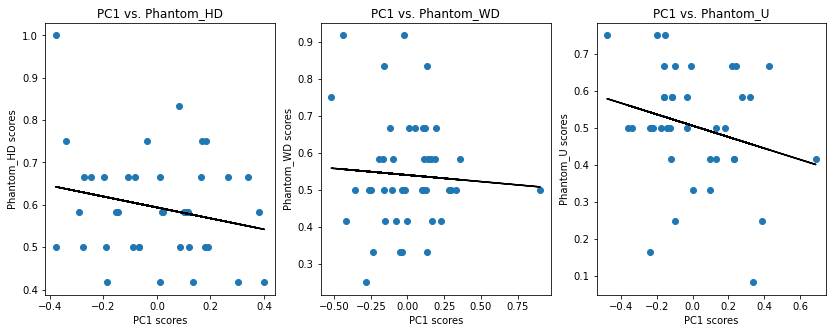

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

ax[0].scatter(PCs_HD_df["PC1"], PCs_HD_df["Phantom_scores"])
a_0, b_0 = np.polyfit(np.array(PCs_HD_df["PC1"]).flatten(), np.array(PCs_HD_df["Phantom_scores"]).flatten(), 1)
ax[0].plot(PCs_HD_df["PC1"], a_0*PCs_HD_df["PC1"]+b_0, color='black')  
ax[0].set_xlabel("PC1 scores")
ax[0].set_ylabel("Phantom_HD scores")
ax[0].set_title("PC1 vs. Phantom_HD")

ax[1].scatter(PCs_WD_df["PC1"], PCs_WD_df["Phantom_scores"])
a_1, b_1 = np.polyfit(np.array(PCs_WD_df["PC1"]).flatten(), np.array(PCs_WD_df["Phantom_scores"]).flatten(), 1)
ax[1].plot(PCs_WD_df["PC1"], a_1*PCs_WD_df["PC1"]+b_1, color='black')  
ax[1].set_xlabel("PC1 scores")
ax[1].set_ylabel("Phantom_WD scores")
ax[1].set_title("PC1 vs. Phantom_WD")

ax[2].scatter(PCs_U_df["PC1"], PCs_U_df["Phantom_scores"])
a_2, b_2 = np.polyfit(np.array(PCs_U_df["PC1"]).flatten(), np.array(PCs_U_df["Phantom_scores"]).flatten(), 1)
ax[2].plot(PCs_U_df["PC1"], a_2*PCs_U_df["PC1"]+b_2, color='black')  
ax[2].set_xlabel("PC1 scores")
ax[2].set_ylabel("Phantom_U scores")
ax[2].set_title("PC1 vs. Phantom_U")

Text(0.5, 1.0, 'PC2 vs. Phantom_U')

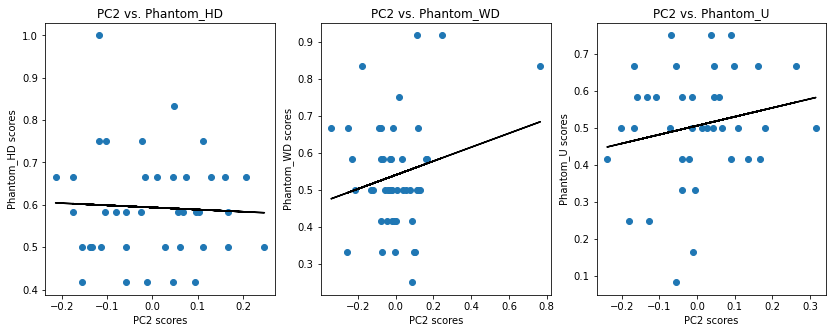

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

ax[0].scatter(PCs_HD_df["PC2"], PCs_HD_df["Phantom_scores"])
a_0, b_0 = np.polyfit(np.array(PCs_HD_df["PC2"]).flatten(), np.array(PCs_HD_df["Phantom_scores"]).flatten(), 1)
ax[0].plot(PCs_HD_df["PC2"], a_0*PCs_HD_df["PC2"]+b_0, color='black')  
ax[0].set_xlabel("PC2 scores")
ax[0].set_ylabel("Phantom_HD scores")
ax[0].set_title("PC2 vs. Phantom_HD")

ax[1].scatter(PCs_WD_df["PC2"], PCs_WD_df["Phantom_scores"])
a_1, b_1 = np.polyfit(np.array(PCs_WD_df["PC2"]).flatten(), np.array(PCs_WD_df["Phantom_scores"]).flatten(), 1)
ax[1].plot(PCs_WD_df["PC2"], a_1*PCs_WD_df["PC2"]+b_1, color='black')  
ax[1].set_xlabel("PC2 scores")
ax[1].set_ylabel("Phantom_WD scores")
ax[1].set_title("PC2 vs. Phantom_WD")

ax[2].scatter(PCs_U_df["PC2"], PCs_U_df["Phantom_scores"])
a_2, b_2 = np.polyfit(np.array(PCs_U_df["PC2"]).flatten(), np.array(PCs_U_df["Phantom_scores"]).flatten(), 1)
ax[2].plot(PCs_U_df["PC2"], a_2*PCs_U_df["PC2"]+b_2, color='black')  
ax[2].set_xlabel("PC2 scores")
ax[2].set_ylabel("Phantom_U scores")
ax[2].set_title("PC2 vs. Phantom_U")

#### PCA (Classic decoys + phantoms) (Filtered items)

In [70]:
# Create new Dataframes with all information.

ClassicDecoys_Phantoms_HD_df = ClassicDecoys_HD_wBias_df.copy()
ClassicDecoys_Phantoms_HD_df["Phantom_scores"] = HD_scores_CI_all

ClassicDecoys_Phantoms_WD_df = ClassicDecoys_WD_wBias_df.copy()
ClassicDecoys_Phantoms_WD_df["Phantom_scores"] = WD_scores_CI_all

ClassicDecoys_Phantoms_U_df = ClassicDecoys_U_wBias_df.copy()
ClassicDecoys_Phantoms_U_df["Phantom_scores"] = U_scores_CI_all

In [72]:
principalComponents_ClassicD_HD_filtered = pca2.fit_transform(ClassicDecoys_Phantoms_HD_df)

print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

[0.52176101 0.1776909  0.16028237]
0.8597342792294451


In [73]:
principalComponents_ClassicD_WD_filtered = pca2.fit_transform(ClassicDecoys_Phantoms_WD_df)

print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

[0.47371523 0.24434757 0.15973633]
0.8777991274991035


In [74]:
principalComponents_ClassicD_U_filtered = pca2.fit_transform(ClassicDecoys_Phantoms_U_df)

print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

[0.57519782 0.21241721 0.12757158]
0.9151866086682255


In [76]:
#Two way anova betweeen classic decoy scores, and three phantom desirability conditions. 
#Start paper with methods and figures. 

## All decoys visualization (unfiltered phantom scores)

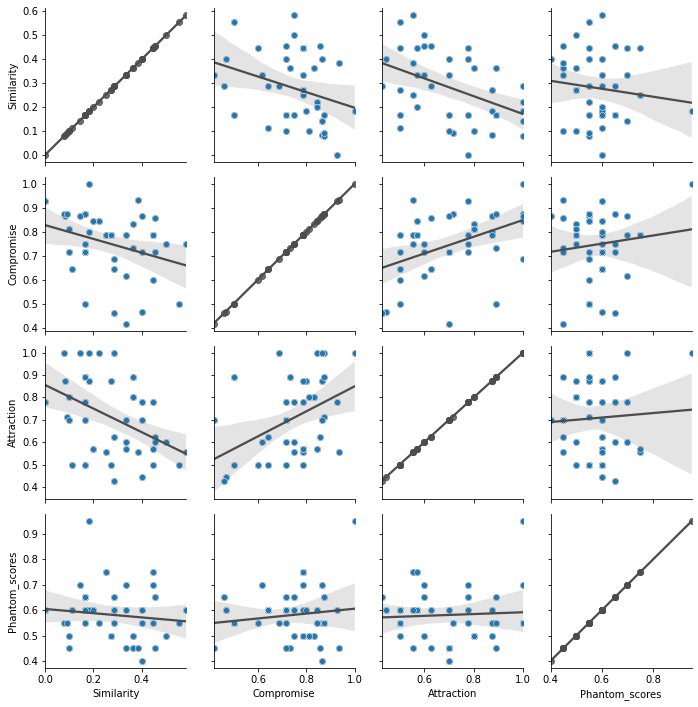

In [79]:
#ClassicDecoys_Phantoms_HD_wB_df

g = sns.PairGrid(ClassicDecoys_Phantoms_HD_wB_df)
g.map(sns.regplot, color=".3")
g.map_offdiag(sns.scatterplot)

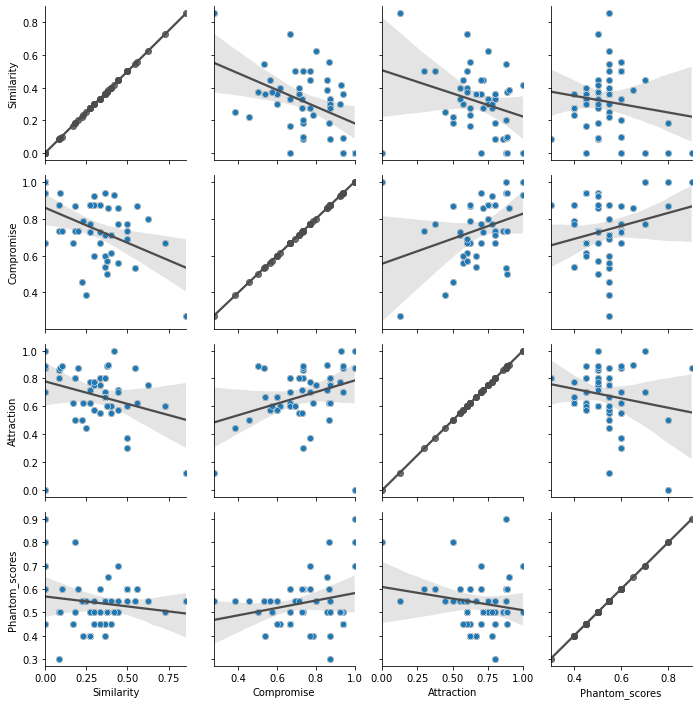

In [81]:
g = sns.PairGrid(ClassicDecoys_Phantoms_WD_wB_df)
g.map(sns.regplot, color=".3")
g.map_offdiag(sns.scatterplot)

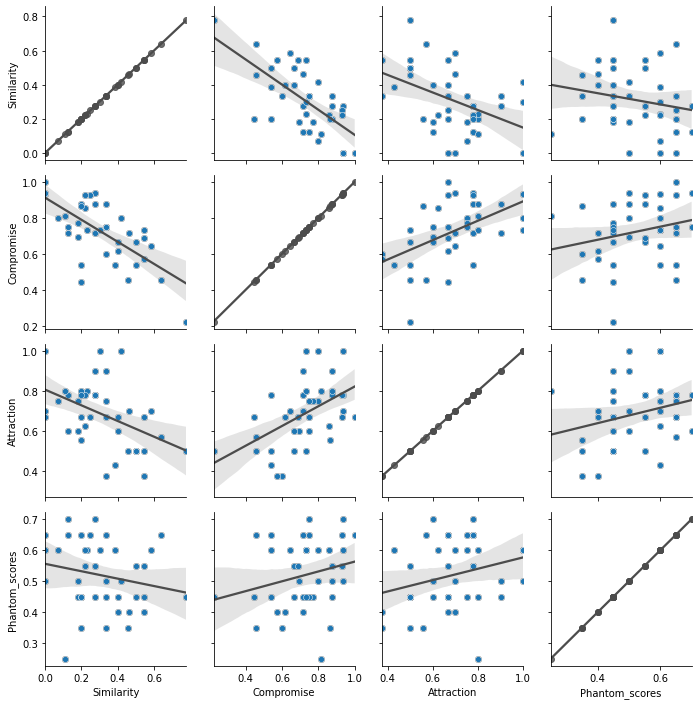

In [82]:
g = sns.PairGrid(ClassicDecoys_Phantoms_U_wB_df)
g.map(sns.regplot, color=".3")
g.map_offdiag(sns.scatterplot)

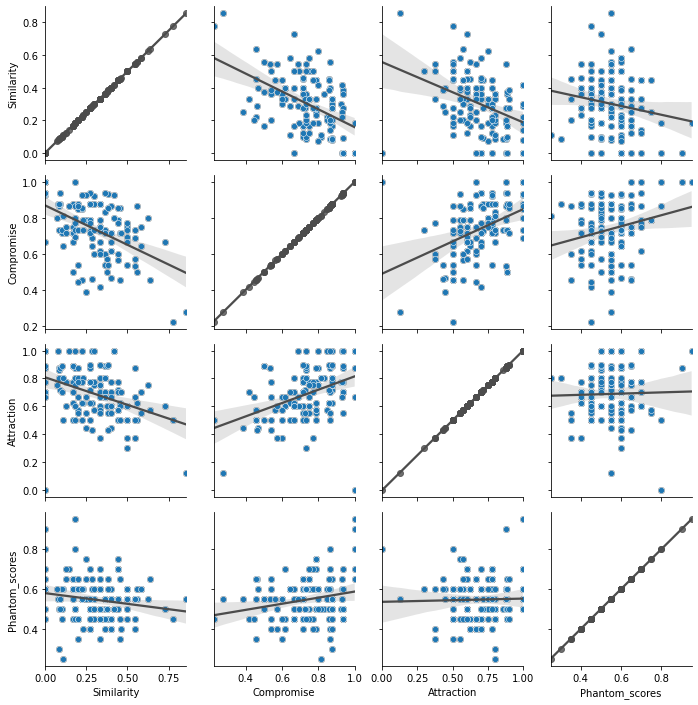

In [83]:
All_ClassicDecoys_Phantoms_wB_df = ClassicDecoys_Phantoms_HD_wB_df.append(ClassicDecoys_Phantoms_WD_wB_df, ignore_index=True)
All_ClassicDecoys_Phantoms_wB_df = All_ClassicDecoys_Phantoms_wB_df.append(ClassicDecoys_Phantoms_U_wB_df, ignore_index=True)

g = sns.PairGrid(All_ClassicDecoys_Phantoms_wB_df)
g.map(sns.regplot, color=".3")
g.map_offdiag(sns.scatterplot)



## All decoys visualization (filtered phantom scores)

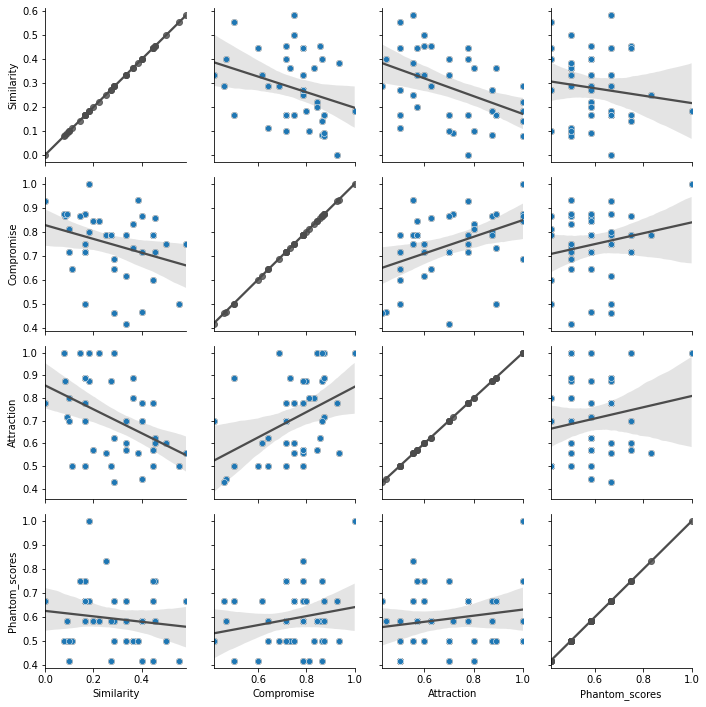

In [75]:
# Relationship between Classic decoys and HD Phantom scores

g = sns.PairGrid(ClassicDecoys_Phantoms_HD_df)
g.map(sns.regplot, color=".3")
g.map_offdiag(sns.scatterplot)

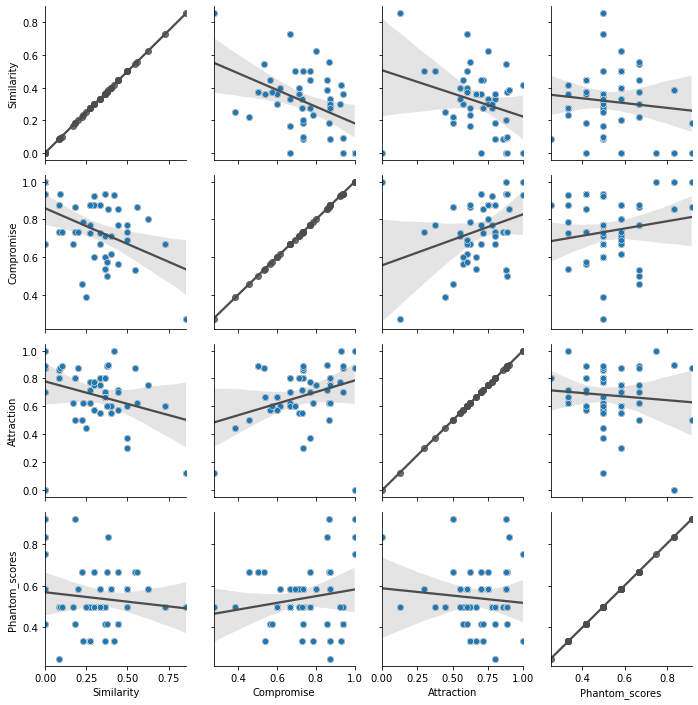

In [77]:
# Relationship between Classic decoys and WD Phantom scores

g = sns.PairGrid(ClassicDecoys_Phantoms_WD_df)
g.map(sns.regplot, color=".3")
g.map_offdiag(sns.scatterplot)

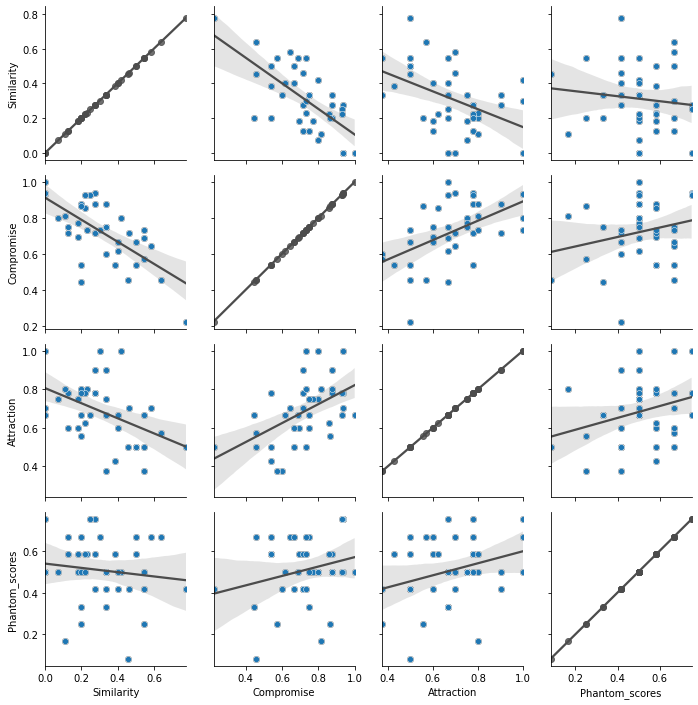

In [78]:
# Relationship between Classic decoys and U Phantom scores

g = sns.PairGrid(ClassicDecoys_Phantoms_U_df)
g.map(sns.regplot, color=".3")
g.map_offdiag(sns.scatterplot)

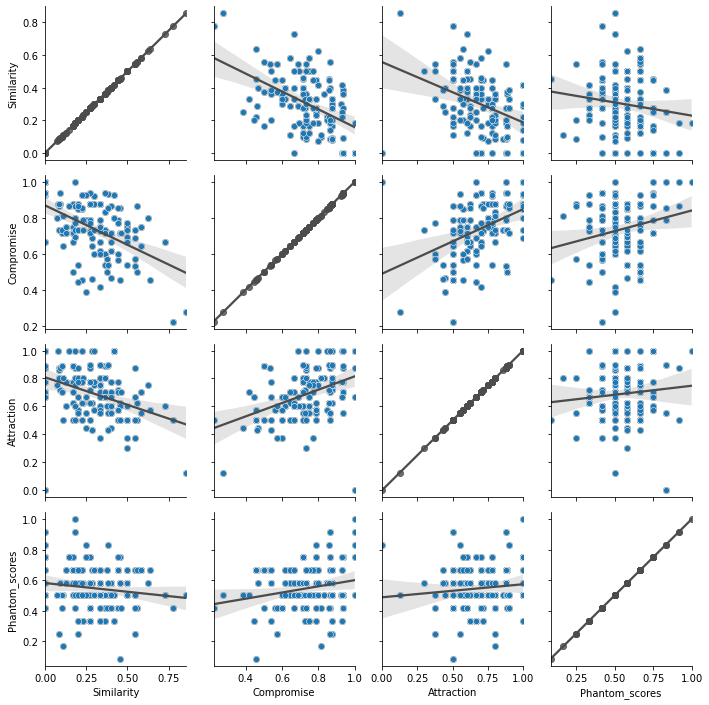

In [84]:
All_ClassicDecoys_Phantoms_df = ClassicDecoys_Phantoms_HD_df.append(ClassicDecoys_Phantoms_WD_df, ignore_index=True)
All_ClassicDecoys_Phantoms_df = All_ClassicDecoys_Phantoms_df.append(ClassicDecoys_Phantoms_U_df, ignore_index=True)

g = sns.PairGrid(All_ClassicDecoys_Phantoms_df)
g.map(sns.regplot, color=".3")
g.map_offdiag(sns.scatterplot)
